In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nltk.tokenize import word_tokenize

In [234]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
url = "/content/IMDb_MoviesIndia.csv"

In [5]:
df = pd.read_csv(url, encoding='latin-1')

EDA AND PREPROCESSING

In [6]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
#processing-> either string types or numerical
df['Duration'] = df['Duration'].str.extract(r'(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'] = df['Duration'].astype('Int64')


In [9]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,<NA>,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
df['Year'] = df['Year'].str.extract(r'\((\d+)\)')

In [11]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,<NA>,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [12]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,1988,<NA>,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,<NA>,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,<NA>,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,1998,130,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [13]:
#MISSING VALUES OF INTEGERS
df['Year'].fillna(method = 'bfill',inplace = True)
df['Duration'].fillna(df['Duration'].mode(), inplace = True)
df['Rating'].fillna(df['Rating'].mean(),inplace = True)
df['Votes'].fillna(df['Votes'].fillna(0), inplace = True)

In [183]:
df['Votes'].fillna(df['Votes'].fillna(0), inplace = True)

In [14]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,2019,120,Drama,5.841621,0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",5.841621,0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,5.841621,0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [15]:
df['Name'].fillna('Unknown', inplace=True)
df['Genre'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Actor 1'].fillna('Unknown', inplace=True)
df['Actor 2'].fillna('Unknown', inplace=True)
df['Actor 3'].fillna('Unknown', inplace=True)


In [16]:
df['Duration'].fillna(df['Duration'].mode()[0], inplace = True)

In [17]:
df.iloc[1355:1360,:]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1355,Atma Vishwas,1985,120,Drama,5.841621,0,Mandhar Shetty,Firoz Irani,Kiran Kumar,Shashi Ranjan
1356,Atmadaan,1989,120,Drama,5.841621,0,Rishi Sharma,Sadashiv Amrapurkar,Abhi Bhattacharya,Rameshwari
1357,Atmaram,1979,120,Family,5.000000,6,Sohanlal Kanwar,Pran,Amjad Khan,Vinod Mehra
1358,Atrangi Re,2021,120,"Comedy, Drama, Romance",5.841621,0,Aanand L. Rai,Akshay Kumar,Dhanush,Sara Ali Khan
1359,Atript Atma,1983,120,Horror,5.841621,0,Amar Nanda,Unknown,Unknown,Unknown


In [18]:
df.info()
print("THIS SHOWS THAT THERE ARE NO MORE MISSING VALUES HERE")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  object 
 2   Duration  15509 non-null  Int64  
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     15509 non-null  object 
 6   Director  15509 non-null  object 
 7   Actor 1   15509 non-null  object 
 8   Actor 2   15509 non-null  object 
 9   Actor 3   15509 non-null  object 
dtypes: Int64(1), float64(1), object(8)
memory usage: 1.2+ MB
THIS SHOWS THAT THERE ARE NO MORE MISSING VALUES HERE


In [19]:
df['Votes'] = pd.to_numeric(df['Votes'], errors = 'coerce')

Text(0, 0.5, 'Votes')

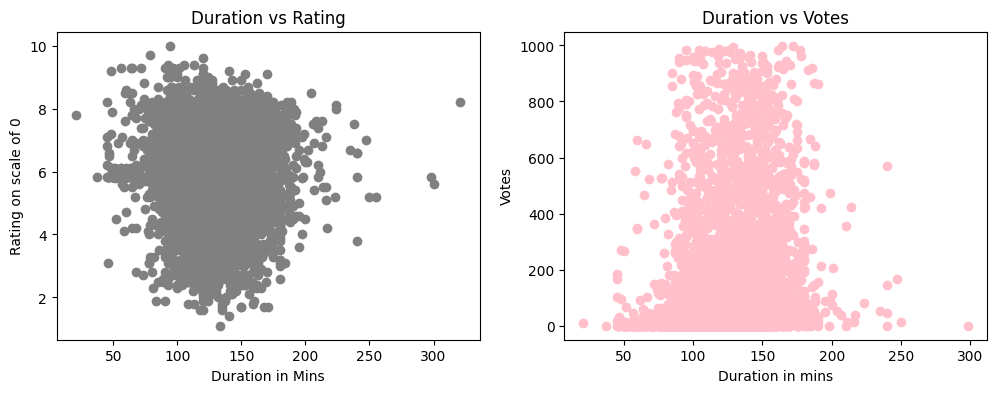

In [64]:
#overall graph view

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.scatter(df['Duration'],df['Rating'], color = "Grey")
plt.title("Duration vs Rating")
plt.xlabel("Duration in Mins")
plt.ylabel("Rating on scale of 0")
plt.subplot(1,2,2)
plt.scatter(df['Duration'],df['Votes'], color = "Pink")
plt.title("Duration vs Votes")
plt.xlabel("Duration in mins")
plt.ylabel("Votes")

In [21]:
dfdt = pd.DataFrame(df['Year'])
dfdt['Year'] = pd.to_datetime(dfdt['Year'], format='%Y')
dfdt['Duration'] = df['Duration']

In [22]:
dfdt.head()

,Year,Duration
0,2019-01-01,120
1,2019-01-01,109
2,2021-01-01,90
3,2019-01-01,110
4,2010-01-01,105


Text(0, 0.5, 'Duration in Minutes')

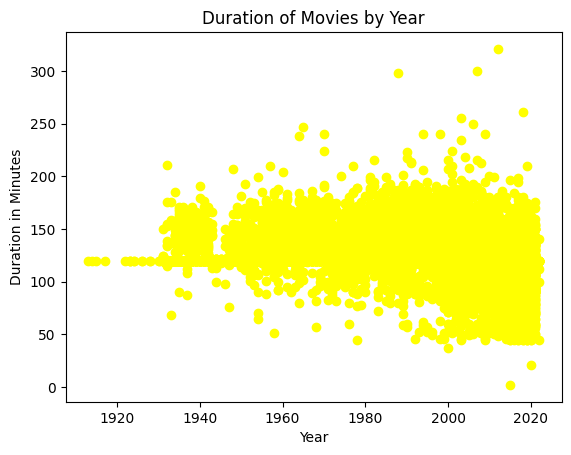

In [23]:
plt.scatter(dfdt['Year'],dfdt['Duration'], color = "Yellow")
plt.title("Duration of Movies by Year")
plt.xlabel("Year")
plt.ylabel("Duration in Minutes")

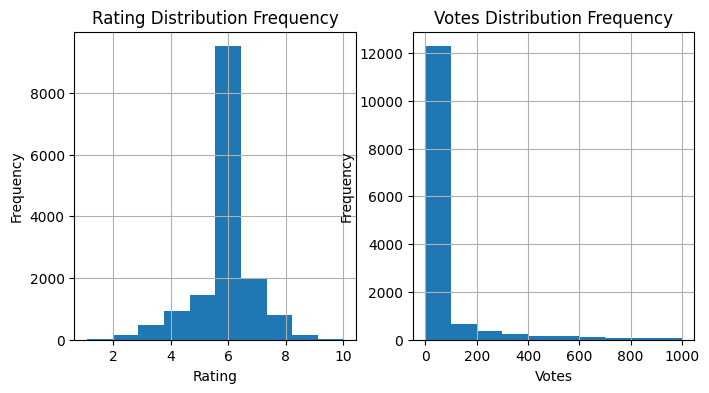

In [24]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(df['Rating'])
plt.title("Rating Distribution Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid()
plt.subplot(1,2,2)
plt.hist(df['Votes'])
plt.title("Votes Distribution Frequency")
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.grid()


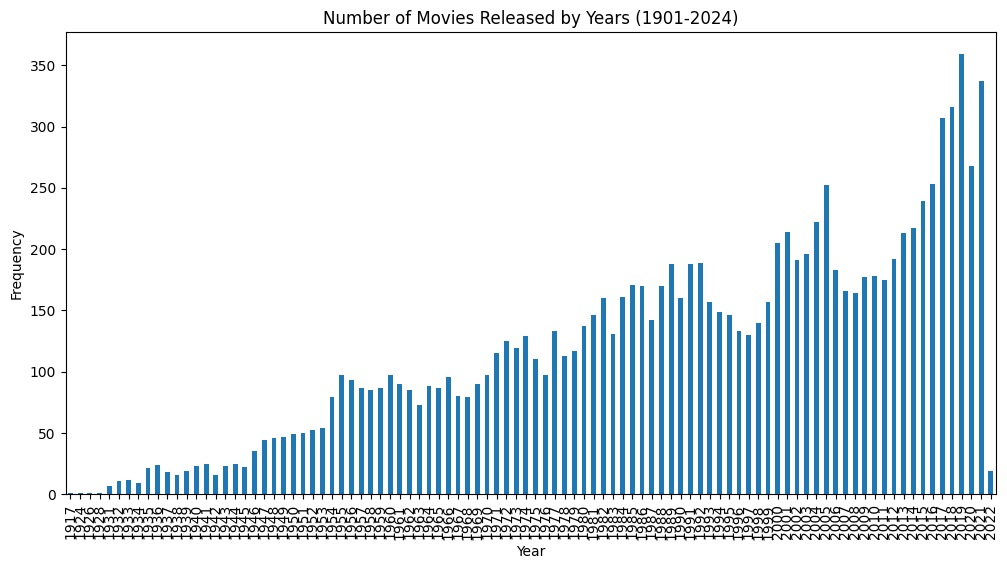

In [65]:
# Convert 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter years from 1901 to 2024
filtered_years = df[(df['Year'] >= 1901) & (df['Year'] <= 2024)]

# Plot the frequency distribution of years
plt.figure(figsize=(12, 6))
filtered_years['Year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of Movies Released by Years (1901-2024)')
plt.show()


In [26]:
print(df['Actor 1'].value_counts())
print(df['Actor 2'].value_counts())
print(df['Actor 3'].value_counts())

Unknown                 1617
Ashok Kumar              158
Jeetendra                140
Dharmendra               140
Mithun Chakraborty       133
                        ... 
Abhinav Kumar              1
Shibani Bhattacharya       1
Kavita Kapoor              1
Awdhesh Mishra             1
Sangeeta Tiwari            1
Name: Actor 1, Length: 4719, dtype: int64
Unknown               2384
Rekha                   83
Hema Malini             72
Mithun Chakraborty      63
Dharmendra              61
                      ... 
Paris Keswani            1
Shubhangi Latkar         1
Amit Ghosh               1
Ayushi Singh             1
Sarah Jane Dias          1
Name: Actor 2, Length: 4892, dtype: int64
Unknown               3144
Pran                    91
Shakti Kapoor           65
Anupam Kher             64
Jeevan                  59
                      ... 
Mukhtar Begum            1
Kamna                    1
Amanda Renberg           1
Krishna Chaturvedi       1
Suparna Anand            1
Nam

In [27]:
print("From here it is clear that Actors are so vast")

From here it is clear that Actors are so vast


In [28]:
print(df['Genre'].value_counts())

Drama                         2780
Unknown                       1877
Action                        1289
Thriller                       779
Romance                        708
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 486, dtype: int64


In [29]:
list_Genre=[]
list_Genre=df['Genre'].str.split(",")
list_Genre

0                   [Drama]
1                   [Drama]
2         [Drama,  Musical]
3        [Comedy,  Romance]
4                   [Drama]
                ...        
15504              [Action]
15505      [Action,  Drama]
15506              [Action]
15507              [Action]
15508      [Action,  Drama]
Name: Genre, Length: 15509, dtype: object

In [30]:
Genre=[]
for x in list_Genre:
  Genre.extend(x)

In [255]:
# Check if all four attributes have 'Unknown' value
unknown_mask = (df['Actor 1'] == 'Unknown') & (df['Actor 2'] == 'Unknown') & \
               (df['Actor 3'] == 'Unknown') & (df['Director'] == 'Unknown')

# Drop rows where all four attributes are 'Unknown'
df = df[~unknown_mask]


In [31]:
Genres=[i.strip() for i in Genre]

In [32]:
df2=pd.DataFrame(Genres)

In [35]:
count_of_genre=df2["Genre"].value_counts()
count_of_genre

Drama          7243
Action         3543
Romance        2449
Comedy         2029
Unknown        1877
Thriller       1713
Crime          1322
Family          943
Musical         589
Adventure       541
Horror          524
Mystery         513
Fantasy         458
Documentary     383
Biography       208
History         207
Animation       125
Music            90
Sport            70
Sci-Fi           58
War              47
News              9
Western           5
Reality-TV        3
Short             1
Name: Genre, dtype: int64

In [37]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,2019,120,Drama,5.841621,0.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",5.841621,0.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,5.841621,0.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [34]:
df2.columns=["Genre"]

In [66]:
df = df[df['Genre'] != 'Unknown']
df = df[df['Actor 1'] != 'Unknown']
df = df[df['Actor 2'] != 'Unknown']
df = df[df['Actor 3'] != 'Unknown']

In [40]:
df.shape


(11368, 10)

Text(0.5, 1.0, 'Top 5 Actors')

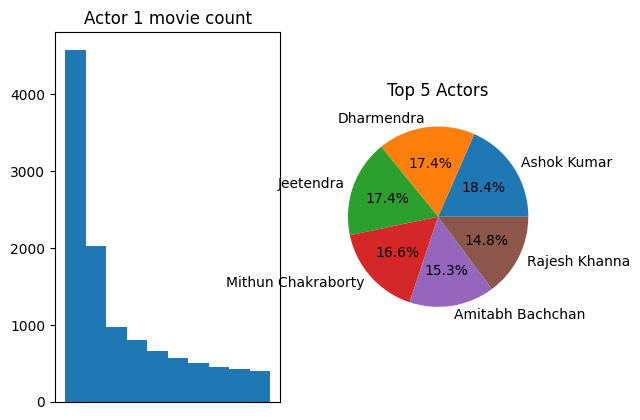

In [41]:
plt.subplot(1,2,1)
plt.hist(df['Actor 1'])
plt.xticks([])
plt.title("Actor 1 movie count")
plt.subplot(1, 2, 2)
actor_counts = df['Actor 1'].value_counts().head(6)

plt.pie(actor_counts, labels=actor_counts.index, autopct='%1.1f%%')
plt.title("Top 5 Actors")

Text(0.5, 1.0, 'Top 5 Actors')

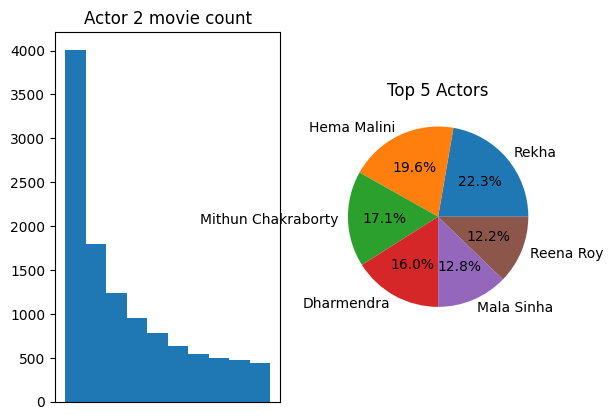

In [42]:
plt.subplot(1,2,1)
plt.hist(df['Actor 2'])
plt.xticks([])
plt.title("Actor 2 movie count")
plt.subplot(1, 2, 2)
actor_counts = df['Actor 2'].value_counts().head(6)

plt.pie(actor_counts, labels=actor_counts.index, autopct='%1.1f%%')
plt.title("Top 5 Actors")

Text(0.5, 1.0, 'Top 5 Actors (Excluding Unknown)')

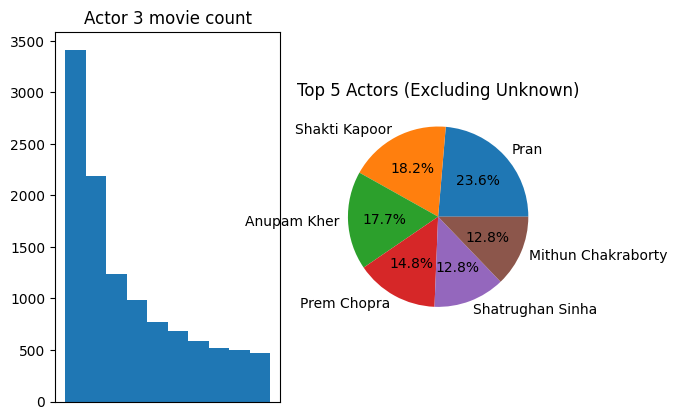

In [43]:
plt.subplot(1,2,1)
plt.hist(df['Actor 3'])
plt.xticks([])
plt.title("Actor 3 movie count")
plt.subplot(1, 2, 2)
actor_counts = df['Actor 3'].value_counts().head(6)
plt.pie(actor_counts, labels=actor_counts.index, autopct='%1.1f%%')
plt.title("Top 5 Actors (Excluding Unknown)")

Text(0.5, 1.0, 'Top 5 Directors (Excluding Unknown)')

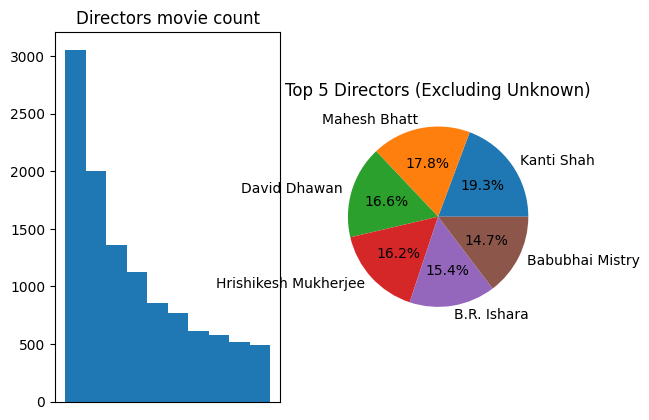

In [44]:
plt.subplot(1,2,1)
plt.hist(df['Director'])
plt.xticks([])
plt.title("Directors movie count")
plt.subplot(1, 2, 2)
dir_counts = df['Director'].value_counts().head(6)  # Include 'Unknown' as well
#dir_counts = dir_counts[1:]  # Exclude the first entry, which is 'Unknown'
plt.pie(dir_counts, labels=dir_counts.index, autopct='%1.1f%%')
plt.title("Top 5 Directors (Excluding Unknown)")

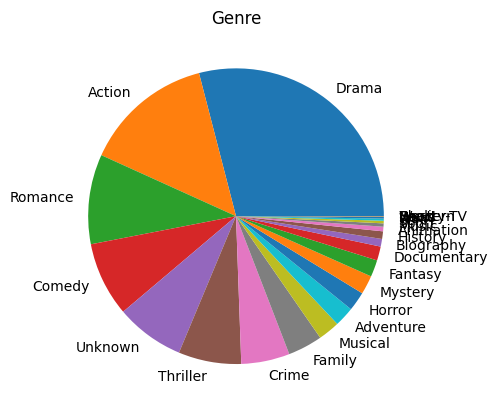

In [45]:
labels = count_of_genre.index
plt.pie(count_of_genre, labels = labels)
plt.title('Genre')
plt.show()

In [46]:
print(df['Actor 1'][3])
print(df.iloc[3,:])

Prateik
Name                #Yaaram
Year                   2019
Duration                110
Genre       Comedy, Romance
Rating                  4.4
Votes                  35.0
Director         Ovais Khan
Actor 1             Prateik
Actor 2          Ishita Raj
Actor 3     Siddhant Kapoor
Name: 3, dtype: object


In [48]:
maxrat = df['Rating'].max()
print(df.loc[maxrat])

Name        1:1.6 An Ode to Lost Love
Year                             2004
Duration                           96
Genre                           Drama
Rating                            6.2
Votes                            17.0
Director                  Madhu Ambat
Actor 1                Rati Agnihotri
Actor 2                Gulshan Grover
Actor 3                 Atul Kulkarni
Name: 10, dtype: object


In [49]:
uni=df2["Genre"].unique()
print(uni)



['Drama' 'Musical' 'Comedy' 'Romance' 'War' 'Documentary' 'Horror'
 'Mystery' 'Thriller' 'Action' 'Crime' 'Unknown' 'Fantasy' 'Family'
 'Biography' 'History' 'Sport' 'Adventure' 'Sci-Fi' 'Music' 'Animation'
 'News' 'Western' 'Reality-TV' 'Short']


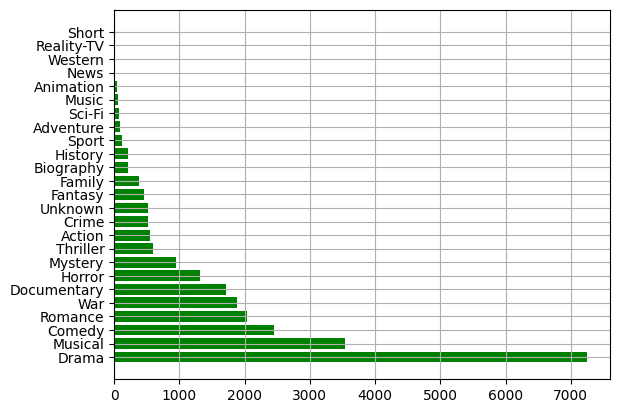

In [50]:
plt.barh(uni,count_of_genre,color = 'Green')
plt.grid()

<ipython-input-62-fdd2b580bf90>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())
<ipython-input-62-fdd2b580bf90>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), figsize = (4,4))


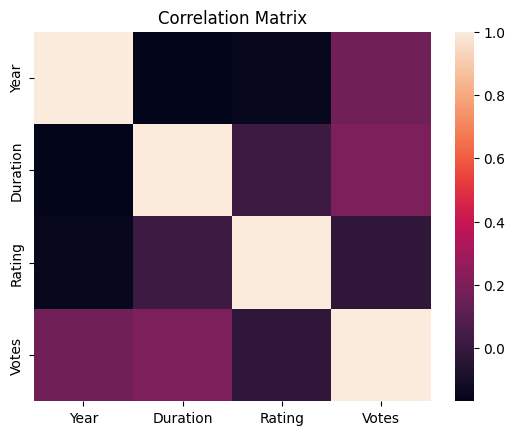

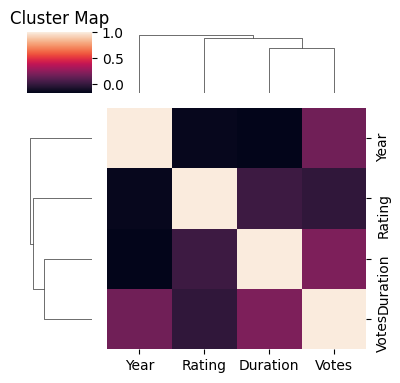

In [62]:
sns.heatmap(df.corr())
plt.title("Correlation Matrix")

sns.clustermap(df.corr(), figsize = (4,4))
plt.title("Cluster Map")
plt.tight_layout()

In [81]:
#we sort all the high rating movies by actors, directors
highrate = df[df['Rating']>=8]
len(highrate)


303

Text(0.5, 1.0, 'Votes for High Rated Movies')

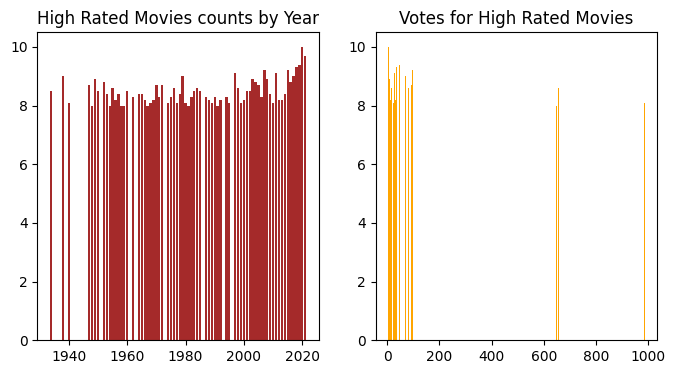

In [94]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.bar(highrate['Year'], highrate['Rating'], color = 'Brown')
plt.title("High Rated Movies counts by Year")
plt.subplot(1,2,2)
plt.bar(highrate['Votes'],highrate['Rating'],color = 'Orange')
plt.title("Votes for High Rated Movies")

Text(0.5, 1.0, 'Top 10 directors of High Rated Movies')

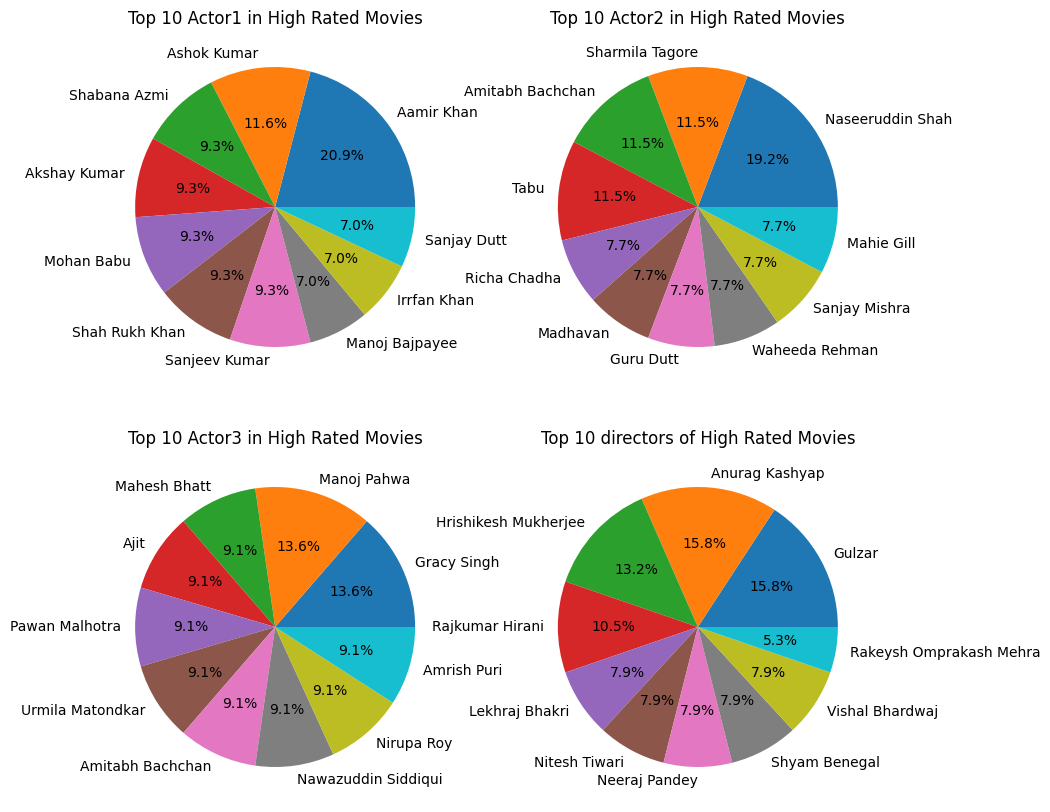

In [108]:
plt.figure(figsize = (10,10))
act2 = highrate['Actor 2'].value_counts().head(10)
act3 = highrate['Actor 3'].value_counts().head(10)
dir = highrate['Director'].value_counts().head(10)
plt.subplot(2,2,1)
plt.pie(highrate['Actor 1'].value_counts().head(10), labels = highrate['Actor 1'].value_counts().head(10).index,autopct = '%1.1f%%')
plt.title("Top 10 Actor1 in High Rated Movies")
plt.subplot(2,2,2)
plt.pie(act2,labels = act2.index, autopct = '%1.1f%%')
plt.title("Top 10 Actor2 in High Rated Movies")
plt.subplot(2,2,3)
plt.pie(act3,labels = act3.index,autopct = '%1.1f%%')
plt.title("Top 10 Actor3 in High Rated Movies")
plt.subplot(2,2,4)
plt.pie(dir,labels = dir.index, autopct = '%1.1f%%')
plt.title("Top 10 directors of High Rated Movies")



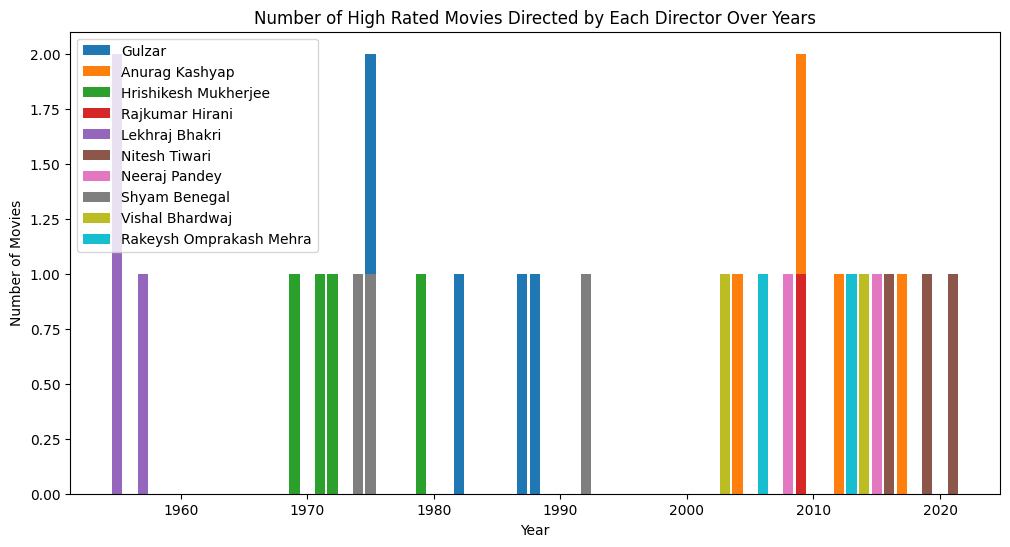

In [125]:
# Get the top 10 directors by the number of movies
top_directors = highrate['Director'].value_counts().head(10).index

# Filter the DataFrame to include only the movies directed by the top 10 directors
top_directors_movies = highrate[highrate['Director'].isin(top_directors)]

# Group by director and year and count the number of movies
director_year_count = top_directors_movies.groupby(['Director', 'Year']).size().reset_index(name='Movie_Count')

# Plot
plt.figure(figsize=(12, 6))
for director in top_directors:
    data = director_year_count[director_year_count['Director'] == director]
    plt.bar(data['Year'], data['Movie_Count'], label=director)

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of High Rated Movies Directed by Each Director Over Years')
plt.legend(loc = 'upper left')
plt.show()


In [157]:
df.describe()

,Year,Duration,Rating,Votes
count,11368.000000,11368.0,11368.000000,9997.000000
mean,1991.789321,126.225633,5.821347,77.808943
std,21.852272,20.881983,1.115720,167.071433
min,1917.000000,21.0,1.100000,0.000000
25%,1977.000000,120.0,5.500000,0.000000
50%,1995.000000,120.0,5.841621,11.000000
75%,2011.000000,136.0,6.400000,57.000000
max,2022.000000,321.0,10.000000,999.000000


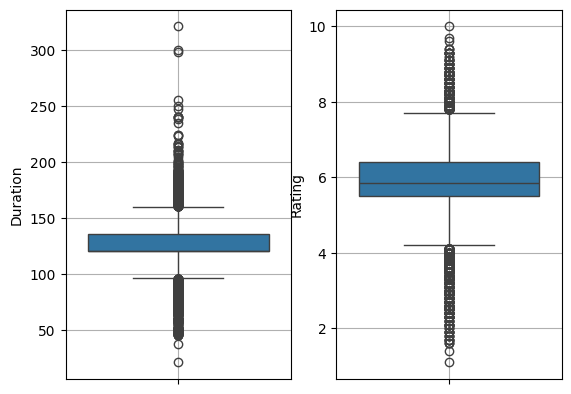

In [162]:
plt.subplot(1,2,1)
sns.boxplot(df['Duration'])
plt.grid()
plt.subplot(1,2,2)
sns.boxplot(df['Rating'])
plt.grid()

In [165]:
#actors.merge
actors_df = highrate[['Actor 1', 'Actor 2', 'Actor 3']]
merged_actors = pd.concat([actors_df[col] for col in actors_df], ignore_index=True)
# Count the occurrences of each actor
actor_counts = merged_actors.value_counts()

# Display the top 5 actors
top_5_actors = actor_counts.head(5)
print("Top 5 Actors:")
print(top_5_actors)


Top 5 Actors:
Aamir Khan          11
Naseeruddin Shah     8
Amitabh Bachchan     8
Manoj Bajpayee       6
Sanjay Mishra        5
dtype: int64


In [166]:
#more movies but not rated high actors
# Filter out high-rated movies
non_highrated = df[~df['Name'].isin(highrate['Name'])]

# Extract actor columns from non-highrated movies
actors_df_non_highrated = non_highrated[['Actor 1', 'Actor 2', 'Actor 3']]

# Concatenate actor columns
merged_actors_non_highrated = pd.concat([actors_df_non_highrated[col] for col in actors_df_non_highrated], ignore_index=True)

# Count the occurrences of each actor
actor_counts_non_highrated = merged_actors_non_highrated.value_counts()

# Display the top 5 actors
top_5_actors_non_highrated = actor_counts_non_highrated.head(5)
print("Top 5 Actors in Non-High-Rated Movies:")
print(top_5_actors_non_highrated)



Top 5 Actors in Non-High-Rated Movies:
Mithun Chakraborty    240
Dharmendra            226
Ashok Kumar           205
Jeetendra             179
Amitabh Bachchan      163
dtype: int64


Text(0.5, 1.0, 'Top 5 Actors(count) in Non high Rated Movies')

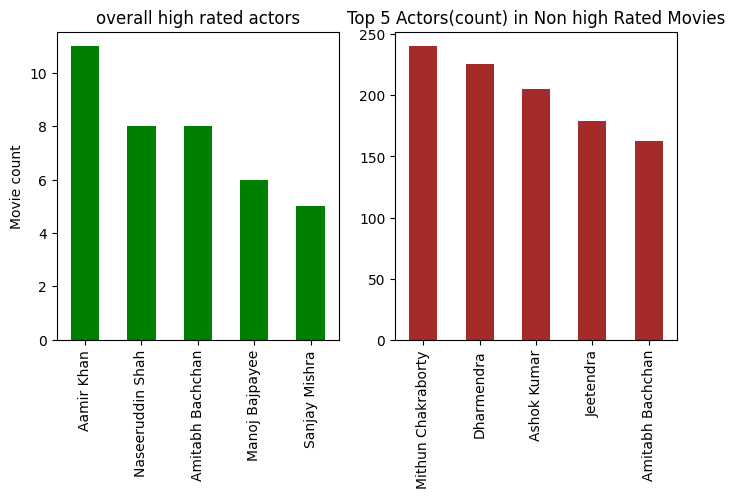

In [172]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
top_5_actors.plot(kind = 'bar', color = 'Green')
plt.title("overall high rated actors")
plt.ylabel("Movie count")
plt.subplot(1,2,2)
top_5_actors_non_highrated.plot(kind = 'bar', color = 'Brown')
plt.title("Top 5 Actors(count) in Non high Rated Movies")


**PREDICTION USING MODEL**

In [200]:


# Assuming you have prepared your dataset and stored it in a DataFrame called 'df'

# Perform one-hot encoding for the 'Genre' column
genre_dummies = pd.get_dummies(df['Genre'], prefix='Genre')

# Perform one-hot encoding for the 'Actor 1', 'Actor 2', and 'Actor 3' columns
actor1_dummies = pd.get_dummies(df['Actor 1'], prefix='Actor1')
actor2_dummies = pd.get_dummies(df['Actor 2'], prefix='Actor2')
actor3_dummies = pd.get_dummies(df['Actor 3'], prefix='Actor3')

# Perform one-hot encoding for the 'Director' column
director_dummies = pd.get_dummies(df['Director'], prefix='Director')

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, genre_dummies, actor1_dummies, actor2_dummies, actor3_dummies, director_dummies], axis=1)

# Drop the original categorical columns
df_encoded.drop(['Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Director'], axis=1, inplace=True)


In [203]:
X = df_encoded.drop(['Name', 'Rating'], axis=1)  # Drop 'Name' and 'Rating' columns
y = df_encoded['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict ratings on the test set
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9606887504460494.0


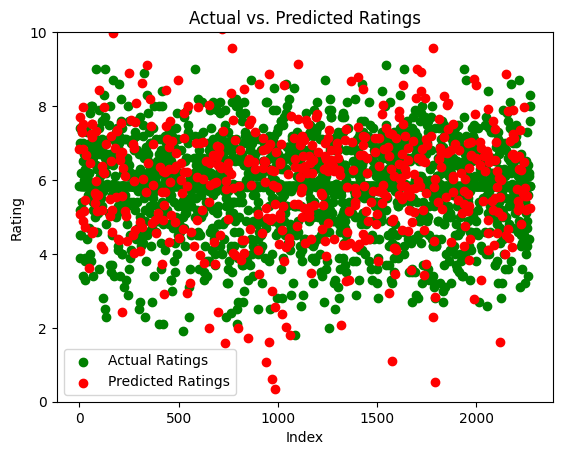

In [219]:


# Create scatter plot of actual vs. predicted ratings
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual Ratings')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Ratings')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.ylim(0,10)
plt.title('Actual vs. Predicted Ratings')
plt.legend()
plt.show()



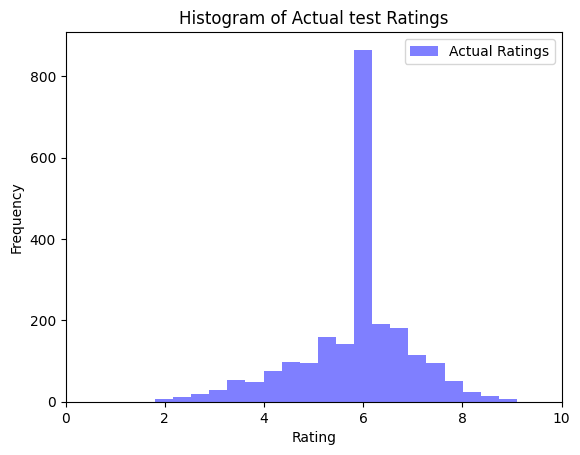

In [233]:
import matplotlib.pyplot as plt

# Plot histogram of y_test
plt.hist(y_test, bins=20, color='blue', alpha=0.5, label='Actual Ratings')


# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(0,10)
plt.title('Histogram of Actual test Ratings')
plt.legend()

# Show plot
plt.show()


In [235]:
print("Errors")
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Errors
Mean Absolute Error (MAE): 21834029.94730117
Mean Squared Error (MSE): 9606887504460494.0
Root Mean Squared Error (RMSE): 98014731.05845107
R-squared (R2) Score: -7904552802798360.0


In [237]:
coef = reg.coef_
print("Coefficients:", coef)

Coefficients: [-3.68593791e-02  6.27053996e-03 -3.33463060e-04 ...  7.63078770e+06
 -1.62704822e+07  9.38459167e+06]
